In [60]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [61]:
data = pd.read_csv('../data/raw/Data.csv', sep=';')
data.head()

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm,Breite Laserzuschnitt in mm.1,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Laseraussparungen vorhanden? Wenn ja: Gesamtlänge aller Aussparungen in mm
0,1,A,1376209,Anschlag,Eigenfertigungsteil,"3,58","194,3",80,"0,74",6,S355MC,4,"109,9"
1,2,A,1328576,Rippe,Eigenfertigungsteil,"1,17","129,1","72,3","0,269",8,S355MC,0,"3,14"
2,3,A,26405944,Mantel,Kaufteil,14,"177,1",784,"5,2",5,Hardox 400,1,0
3,4,A,2601581,Verschleissblech,Kaufteil,"11,08",80,770,"2,391",5,Hardox 400,0,250
4,5,A,1412785,Verstärkung,Eigenfertigungsteil,"3,32","243,2","191,5","1,059",5,S355MC,2,100


In [62]:
data.rename(columns={'Breite Laserzuschnitt in mm':'Breite Laserzuschnitt in mm 1'}, inplace=True)
data.rename(columns={'Breite Laserzuschnitt in mm.1':'Breite Laserzuschnitt in mm 2'}, inplace=True)
data.rename(columns={'Laseraussparungen vorhanden? Wenn ja: Gesamtlänge aller Aussparungen in mm':'Gesamtlänge aller Aussparungen in mm'}, inplace=True)

In [63]:
cols_with_commas = ['Preis', 'Breite Laserzuschnitt in mm 1', 'Breite Laserzuschnitt in mm 2', 'Bauteilgewicht in kg', 'Materialsärke in mm', 'Gesamtlänge aller Aussparungen in mm']

for col in cols_with_commas: 
    data[col] = data[col].astype(str).str.replace(',', '.').astype(float)

data['Anzahl der Abkantungen'] = data['Anzahl der Abkantungen'].astype(int)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Id                                    149 non-null    int64  
 1   Bereich                               149 non-null    object 
 2   Sachnummer                            149 non-null    int64  
 3   Bezeichnung                           149 non-null    object 
 4   Bezugsquelle                          149 non-null    object 
 5   Preis                                 149 non-null    float64
 6   Breite Laserzuschnitt in mm 1         149 non-null    float64
 7   Breite Laserzuschnitt in mm 2         149 non-null    float64
 8   Bauteilgewicht in kg                  149 non-null    float64
 9   Materialsärke in mm                   149 non-null    float64
 10  Material                              149 non-null    object 
 11  Anzahl der Abkantun

Text(0, 0.5, 'Anzahl')

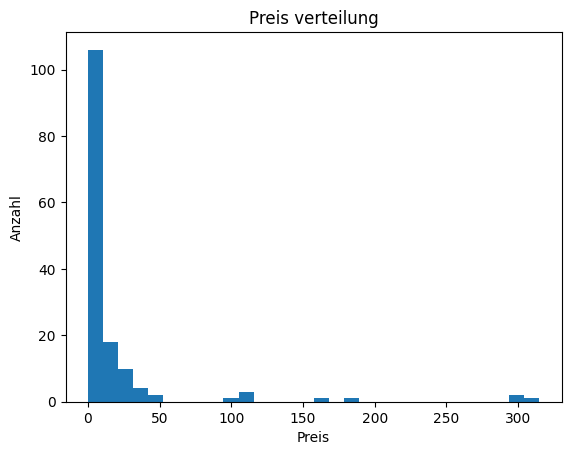

In [65]:
plt.hist(data['Preis'], bins=30)
plt.title('Preis verteilung')
plt.xlabel('Preis')
plt.ylabel('Anzahl')

In [66]:
data_outliers = data[data['Preis'] > 40]
data_outliers

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm 1,Breite Laserzuschnitt in mm 2,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Gesamtlänge aller Aussparungen in mm
45,46,A,6092978,Seitenwand li,Kaufteil,105.76,679.9,866.1,16.978,8.0,S355MC,1,2908.580
59,60,B,2602769,Deckel,Eigenfertigungsteil,45.25,1428.5,646.7,9.872,3.0,S700MC,0,3600.000
91,92,B,4861037,Bodenblech li,Eigenfertigungsteil,103.93,2403.0,739.2,42.000,3.0,S355MC,5,1796.080
100,101,C,2652291,U-Blech,Eigenfertigungsteil,314.66,2488.0,842.8,81.070,5.0,S550MC,2,1878.384
104,105,C,6522927,Deckel,Eigenfertigungsteil,300.02,2488.0,1187.3,46.186,5.0,S550MC,4,1045.280
110,111,C,7359993,U-Blech,Eigenfertigungsteil,112.80,1300.0,842.8,38.952,5.0,S550MC,2,1274.840
114,115,C,7298483,Flanschplatte,Eigenfertigungsteil,44.30,438.4,456.7,8.279,15.0,S355MC,0,1748.700
118,119,C,7359978,Deckel,Eigenfertigungsteil,157.74,1592.6,1178.2,28.184,5.0,S550MC,6,706.060
122,123,C,6541047,U-Blech,Eigenfertigungsteil,179.36,2004.1,838.2,49.391,5.0,S550MC,2,1302.088
126,127,C,6542109,Deckel,Eigenfertigungsteil,295.30,1988.5,1479.8,37.901,5.0,S550MC,4,453.060


In [67]:
data = data[data['Preis'] <= 150]
data_outliers = data[data['Preis'] > 40]
data_outliers

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm 1,Breite Laserzuschnitt in mm 2,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Gesamtlänge aller Aussparungen in mm
45,46,A,6092978,Seitenwand li,Kaufteil,105.76,679.9,866.1,16.978,8.0,S355MC,1,2908.58
59,60,B,2602769,Deckel,Eigenfertigungsteil,45.25,1428.5,646.7,9.872,3.0,S700MC,0,3600.00
91,92,B,4861037,Bodenblech li,Eigenfertigungsteil,103.93,2403.0,739.2,42.000,3.0,S355MC,5,1796.08
110,111,C,7359993,U-Blech,Eigenfertigungsteil,112.80,1300.0,842.8,38.952,5.0,S550MC,2,1274.84
114,115,C,7298483,Flanschplatte,Eigenfertigungsteil,44.30,438.4,456.7,8.279,15.0,S355MC,0,1748.70
135,136,C,6699547,Unterteil,Eigenfertigungsteil,113.17,1651.0,870.6,46.531,6.0,S355MC,4,2359.21


In [68]:
data_U_blech = data[data['Bezeichnung'].str.contains('U-Blech')]
data_U_blech

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm 1,Breite Laserzuschnitt in mm 2,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Gesamtlänge aller Aussparungen in mm
110,111,C,7359993,U-Blech,Eigenfertigungsteil,112.8,1300.0,842.8,38.952,5.0,S550MC,2,1274.84


In [69]:
data_inliers = data[(data['Preis'] < 50) & (data['Bezeichnung'].str.contains('Deckel'))]
data_inliers

,Id,Bereich,Sachnummer,Bezeichnung,Bezugsquelle,Preis,Breite Laserzuschnitt in mm 1,Breite Laserzuschnitt in mm 2,Bauteilgewicht in kg,Materialsärke in mm,Material,Anzahl der Abkantungen,Gesamtlänge aller Aussparungen in mm
51,52,B,2614230,Deckel re un,Eigenfertigungsteil,2.92,173.9,122.5,0.427,4.0,S700MC,1,381.23
57,58,B,2760629,Deckel vo,Eigenfertigungsteil,6.21,387.6,336.7,2.080,3.0,STRENX 700MC,1,209.00
59,60,B,2602769,Deckel,Eigenfertigungsteil,45.25,1428.5,646.7,9.872,3.0,S700MC,0,3600.00
60,61,B,6146419,Deckel li un,Eigenfertigungsteil,2.92,173.9,122.5,0.427,4.0,S700MC,1,381.23
72,73,B,2614649,Deckel li un,Eigenfertigungsteil,2.92,173.9,122.5,0.427,4.0,S700MC,1,381.23
113,114,C,7359961,Deckel,Eigenfertigungsteil,38.68,1113.3,430.6,17.856,6.0,S355MC,0,784.11


Text(0, 0.5, 'Preis')

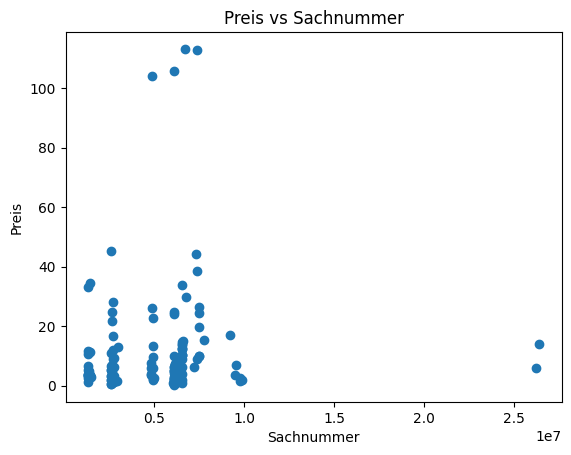

In [70]:
plt.scatter(data['Sachnummer'], data['Preis'])
plt.title('Preis vs Sachnummer')
plt.xlabel('Sachnummer')
plt.ylabel('Preis')

In [71]:
data.drop('Sachnummer', axis=1, inplace=True)

Text(0, 0.5, 'Preis')

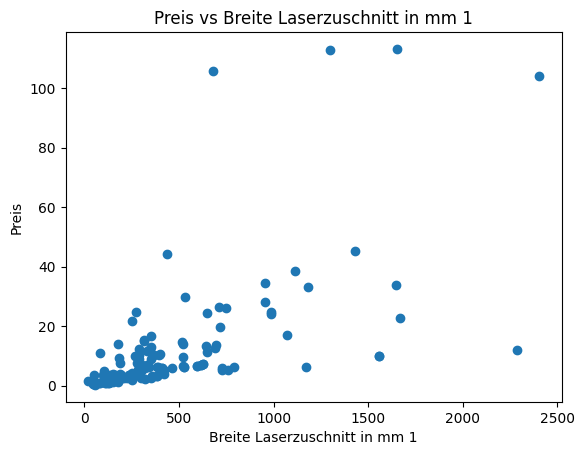

In [72]:
plt.scatter(data['Breite Laserzuschnitt in mm 1'], data['Preis'])
plt.title('Preis vs Breite Laserzuschnitt in mm 1')
plt.xlabel('Breite Laserzuschnitt in mm 1')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

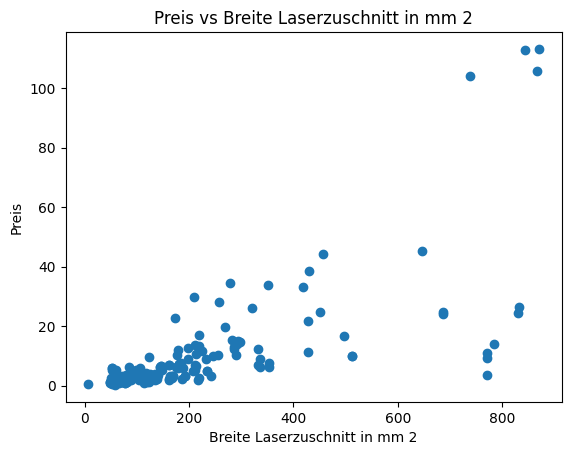

In [73]:
plt.scatter(data['Breite Laserzuschnitt in mm 2'], data['Preis'])
plt.title('Preis vs Breite Laserzuschnitt in mm 2')
plt.xlabel('Breite Laserzuschnitt in mm 2')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

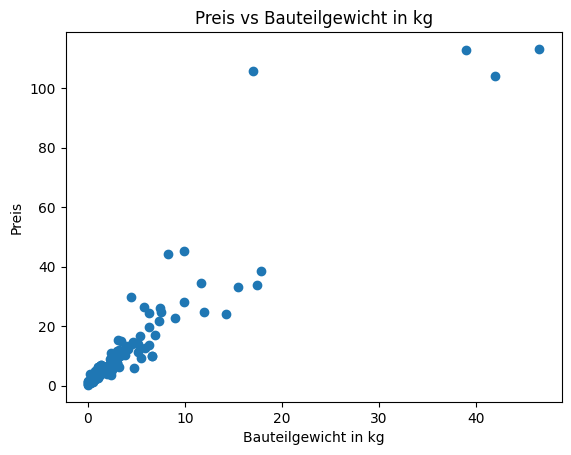

In [74]:
plt.scatter(data['Bauteilgewicht in kg'], data['Preis'])
plt.title('Preis vs Bauteilgewicht in kg')
plt.xlabel('Bauteilgewicht in kg')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

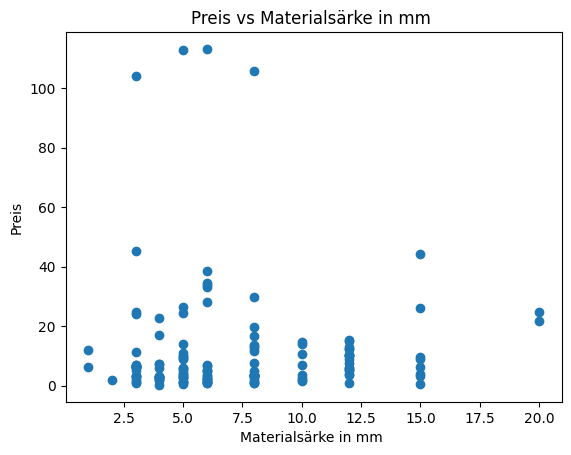

In [75]:
plt.scatter(data['Materialsärke in mm'], data['Preis'])
plt.title('Preis vs Materialsärke in mm ')
plt.xlabel('Materialsärke in mm ')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

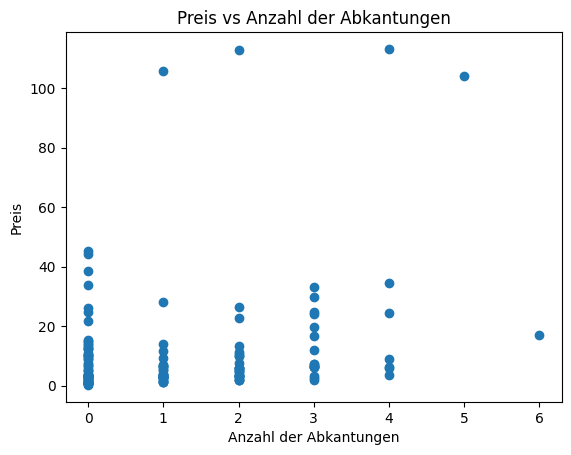

In [76]:
plt.scatter(data['Anzahl der Abkantungen'], data['Preis'])
plt.title('Preis vs Anzahl der Abkantungen')
plt.xlabel('Anzahl der Abkantungen')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

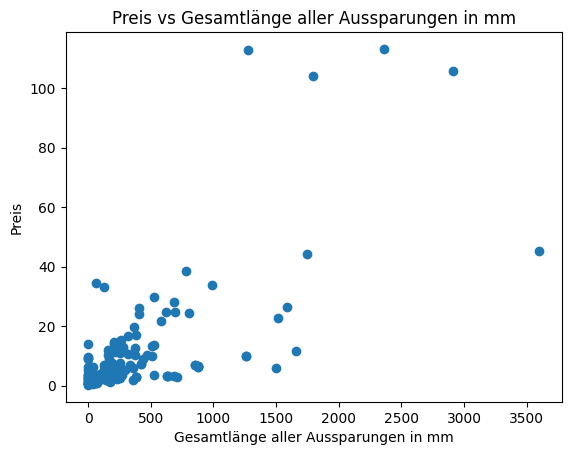

In [77]:
plt.scatter(data['Gesamtlänge aller Aussparungen in mm'], data['Preis'])
plt.title('Preis vs Gesamtlänge aller Aussparungen in mm')
plt.xlabel('Gesamtlänge aller Aussparungen in mm')
plt.ylabel('Preis')

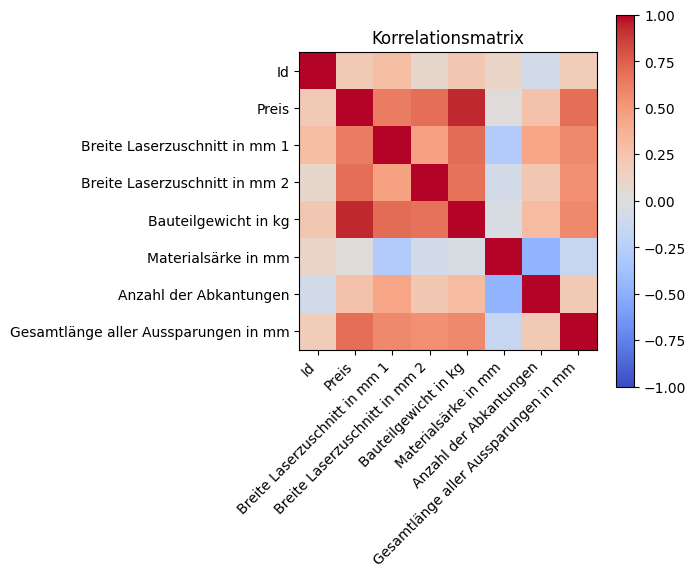

In [78]:
coeff_matrix = data.select_dtypes(include=['int64','float64']).corr()
plt.matshow(coeff_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(coeff_matrix.columns)), coeff_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(coeff_matrix.columns)), coeff_matrix.columns)
plt.title("Korrelationsmatrix")
plt.gca().xaxis.set_ticks_position('bottom')
plt.colorbar()
plt.show()

Text(0, 0.5, 'Preis')

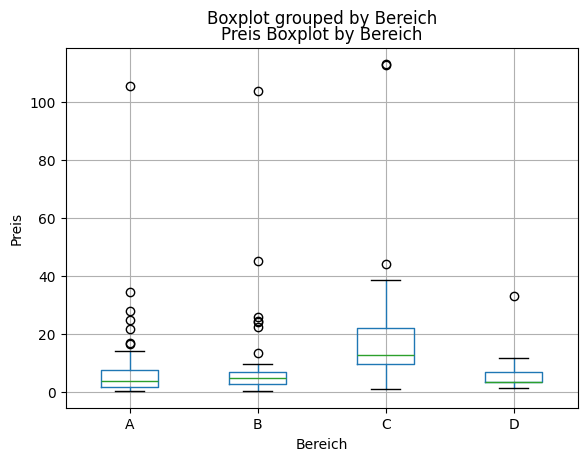

In [79]:
data.boxplot(column='Preis', by='Bereich')
plt.title('Preis Boxplot by Bereich')
plt.xlabel('Bereich')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

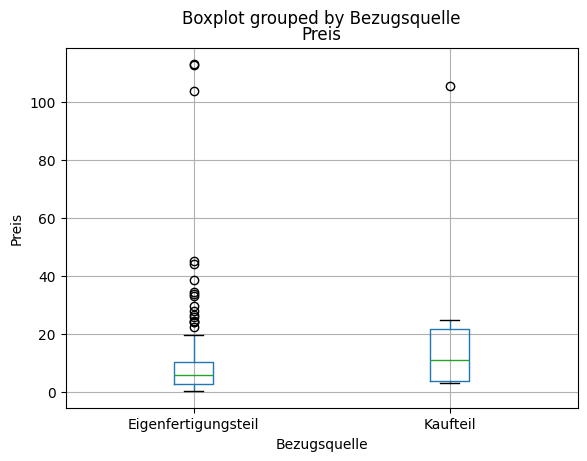

In [80]:
data.boxplot(column='Preis', by='Bezugsquelle')
plt.xlabel('Bezugsquelle')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

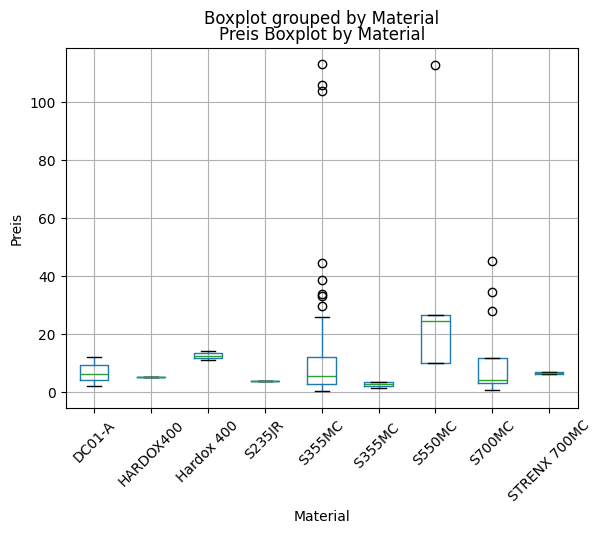

In [81]:
data.boxplot(column='Preis', by='Material')
plt.xticks(rotation=45)
plt.title('Preis Boxplot by Material')
plt.xlabel('Material')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

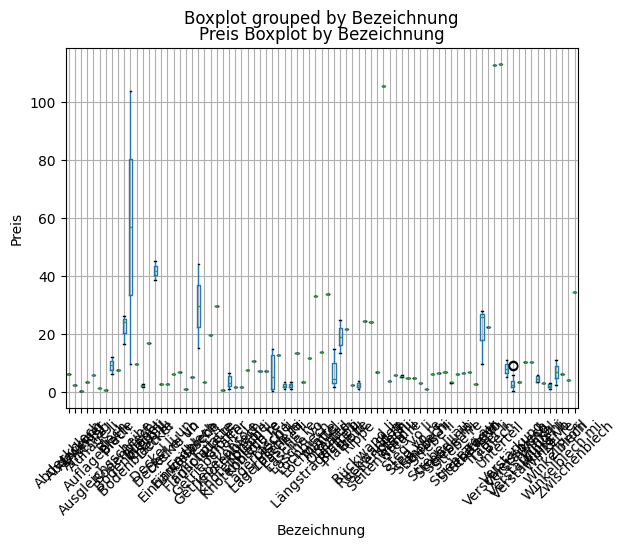

In [82]:
data.boxplot(column='Preis', by='Bezeichnung')
plt.xticks(rotation=45)
plt.title('Preis Boxplot by Bezeichnung')
plt.xlabel('Bezeichnung')
plt.ylabel('Preis')

Text(0, 0.5, 'Preis')

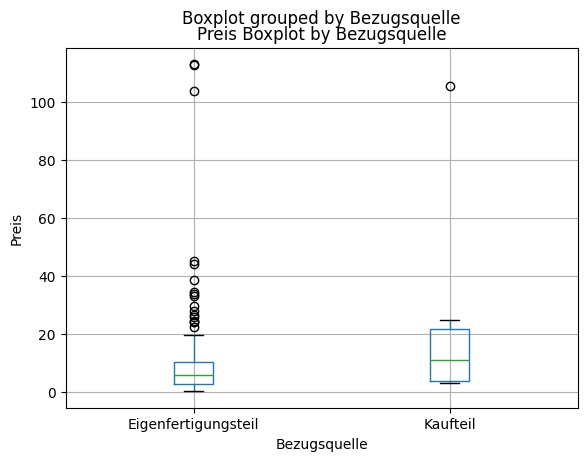

In [83]:
data.boxplot(column='Preis', by='Bezugsquelle')
plt.title('Preis Boxplot by Bezugsquelle')
plt.xlabel('Bezugsquelle')
plt.ylabel('Preis')

In [84]:

# Flaeche = Breite1 * Breite2
data["Flaeche"] = data["Breite Laserzuschnitt in mm 1"] * data["Breite Laserzuschnitt in mm 2"]
# Dichte in kg/m²
data["Dichte"] = (data["Bauteilgewicht in kg"] / data["Flaeche"]) * 1_000_000

data.fillna(0, inplace=True)


In [85]:
# Strings vereinheitlichen
for col in data.select_dtypes(include="object"):
    data[col] = (
        data[col]
        .astype(str)
        .str.strip()          # Leerzeichen entfernen
        .str.replace(r"\s+", " ", regex=True)  # doppelte Spaces zu einem Space
        .str.lower()          # alles klein schreiben
    )

# Manuelle Mapping-Corrections (falls du bestimmte willst)
material_map = {
    "s355mc": "s355mc",
    "s355mc ": "s355mc",
    "hardox 400": "hardox 400",
    "hardox400": "hardox 400",
    "hardox 400": "hardox 400",  # geschütztes Leerzeichen
}

if "Material" in data.columns:
    data["Material"] = data["Material"].replace(material_map)

# Gleiches für Bezeichnung
if "Bezeichnung" in data.columns:
    data["Bezeichnung"] = data["Bezeichnung"].str.replace("blech", "blech")


In [86]:
data.drop(columns='Id', inplace=True)

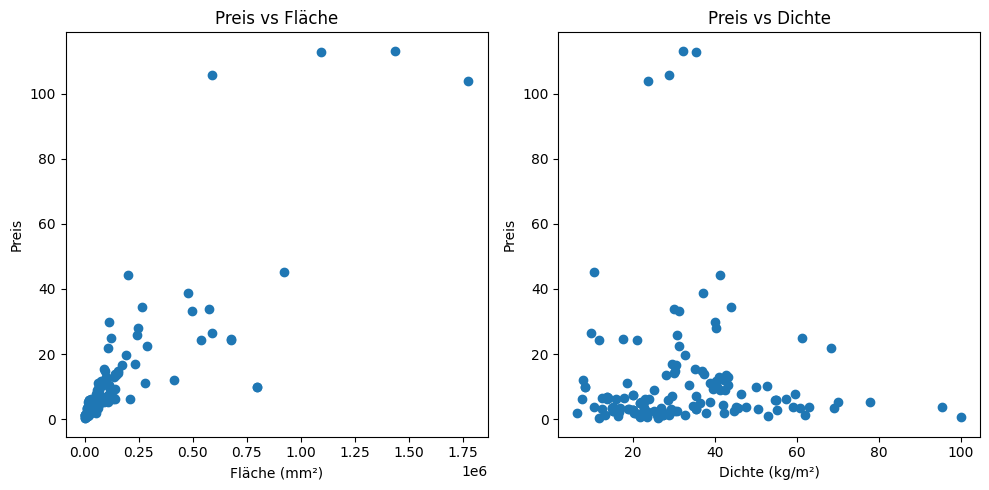

In [87]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Flaeche'], data['Preis'])
plt.title('Preis vs Fläche')
plt.xlabel('Fläche (mm²)')
plt.ylabel('Preis')

plt.subplot(1, 2, 2)
plt.scatter(data['Dichte'], data['Preis'])
plt.title('Preis vs Dichte')
plt.xlabel('Dichte (kg/m²)')
plt.ylabel('Preis')

plt.tight_layout()
plt.show()

In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bereich                               144 non-null    object 
 1   Bezeichnung                           144 non-null    object 
 2   Bezugsquelle                          144 non-null    object 
 3   Preis                                 144 non-null    float64
 4   Breite Laserzuschnitt in mm 1         144 non-null    float64
 5   Breite Laserzuschnitt in mm 2         144 non-null    float64
 6   Bauteilgewicht in kg                  144 non-null    float64
 7   Materialsärke in mm                   144 non-null    float64
 8   Material                              144 non-null    object 
 9   Anzahl der Abkantungen                144 non-null    int64  
 10  Gesamtlänge aller Aussparungen in mm  144 non-null    float64
 11  Flaeche                 

In [89]:
data.to_csv('../data/processed/cleaned_data.csv', sep=',', index=False)

In [ ]:
# Visualisierung von Preis vs Fläche und Dichte
plt.figure(figsize=(12, 5))

# Plot 1: Preis vs Fläche
plt.subplot(1, 2, 1)
plt.scatter(data['Flaeche'], data['Preis'], alpha=0.5)
plt.title('Preis vs Fläche')
plt.xlabel('Fläche (mm²)')
plt.ylabel('Preis')

# Plot 2: Preis vs Dichte
plt.subplot(1, 2, 2)
plt.scatter(data['Dichte'], data['Preis'], alpha=0.5)
plt.title('Preis vs Dichte')
plt.xlabel('Dichte (kg/m²)')
plt.ylabel('Preis')

plt.tight_layout()
plt.show()